## [TITULO DEL PROYECTO]
<img src="">

In [1]:
#@title 1. Montar drive (If you are in in colab){ display-mode: "form" }

import os
from google.colab import drive
path =  "/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project"#@param {type:"string"}
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project


In [2]:
#@title 2. Load libraries { display-mode: "form" }
#@title 2. Load libraries { display-mode: "form" }
import numpy as np
import pandas as pd 
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import json
import os
import tensorflow as tf
from tqdm import tqdm
import seaborn as sb
import seaborn as sns
from nltk.corpus import stopwords
import string
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('stopwords')
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def text_process(mess):
    """
    Tomamos una cadena de texto y le realizamos lo siguiente
    1. Remueve toda la puntuacion
    2. Remover todas las palabras vacias
    3. Retorna una lista con el texto "limpio"
    """
    # Verificamos los caracteres para ver si poseen algun tipo de en puntuación
    nopunc = [char for char in mess if char not in string.punctuation]

    # Vuelve a unir los caracteres para formar la cadena.
    nopunc = ''.join(nopunc)
    
    # Ahora se eliminan las palabras vacías
    word_seq=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return word_seq

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Integrantes:**

- Jorge Andres Mogotocoro Fajardo - 2160075
- 

### Objetivo general

- [OBJETIVO GENERAL]


### Preguntas por responder

- **Problema a resolver:**  
R: 
- **¿Como se va resolver?**  
R: 
- **¿Por qué se necesita resolver este problema?**  
R: 
- **¿Para que?**  
R: 
- **¿Para quien(es) seria util esta solucion?**  
R: 

### Documentacion del problema:



### Implementacion

#### Dataset


#### Cargando data 1 procesada

In [ ]:
df_train = pd.read_csv("data/train.txt", delimiter=';', header=None, names=['sentence','label'])
df_val = pd.read_csv("data/val.txt", delimiter=';',header=None, names=['sentence','label'])
df_test = pd.read_csv("data/test.txt", delimiter=';',header=None, names=['sentence','label'])
df = pd.concat([df_train,df_test,df_val])

In [ ]:
text = df['sentence'].apply(text_process)
text_train = df_train['sentence'].apply(text_process)
text_val = df_val['sentence'].apply(text_process)
text_test = df_test['sentence'].apply(text_process)

In [ ]:
max_len = 100
max_words = 20000
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(text)
sequences_train = tokenizer.texts_to_sequences(text_train)
sequences_val = tokenizer.texts_to_sequences(text_val)
sequences_test = tokenizer.texts_to_sequences(text_test)

In [ ]:
data_train = pad_sequences(sequences_train,maxlen=max_len)
data_val = pad_sequences(sequences_val,maxlen=max_len)
data_test = pad_sequences(sequences_test,maxlen=max_len)

**Datos de Entrenamineto**

In [ ]:
x_train = np.load('data/x_train.npy')
y_train = np.load('data/y_train.npy')

print("Entrenamiento: ",x_train.shape,y_train.shape)

Entrenamiento:  (16000, 100) (16000, 6)


**Datos de Test**

In [ ]:
x_test = np.load('data/x_test.npy')
y_test = np.load('data/y_test.npy')

print("Test: ",x_test.shape,y_test.shape)

Test:  (2000, 100) (2000, 6)


**Datos de val**

In [ ]:
x_val = np.load('data/x_val.npy')
y_val = np.load('data/y_val.npy')

print("Validacion: ",x_val.shape,y_val.shape)

Validacion:  (2000, 100) (2000, 6)


#### Cargando data 2 procesada

In [3]:
x_test = np.load('data processed/x_test_model_1_exp_2.npy')
y_test = np.load('data processed/y_test_model_1_exp_2.npy')

#### Cargando data 3 procesada

#### Modelos

##### Modelo 1: LSTM

Teniendo en cuenta que buscamos predecir un sentimiento dado una sequencia de texto construimos una arquitectura con una celda LSTM, que a nuestro parecer es la mas indicada para trabajar con las oraciones, aunque perfectamente podria ser una RNN debido a que las sequencias no son tan largas, como para los ejemplos de generacion de texto expuestos en la clase. No siendo más se procede con el montaje de la Arquitectura

In [ ]:
#Funcion para crear el modelo, recibe el max de palabras
def crear_modelo(max_words):
  #Modelo sequencial de agregacion de capas
  model = tf.keras.models.Sequential()
  #Para este caso el word embedding sera relacionado a la dimension de nuestro conjunto de palabras
  model.add(tf.keras.layers.Embedding(max_words,64, input_length=max_len))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, activation='tanh',name='bilstm_layer1')))
  #Agregamos una capa de Dropout del 20% de las neuronas
  model.add(tf.keras.layers.Dropout(0.2))
  #Capa intermedia densa
  model.add(tf.keras.layers.Dense(units=64,activation=tf.keras.activations.relu))
  #Capa final del onehot Encoding
  model.add(tf.keras.layers.Dense(6,activation=tf.keras.activations.softmax))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())
  # Presentacion de la arquitectura
  model.summary()
  return model

Instanciamos el modelo

In [ ]:
max_len = 100
max_words = 20000
model = crear_modelo(max_words)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               197632    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 1,494,470
Trainable params: 1,494,470
Non-trainable params: 0
_________________________________________________________________


Empezamos el entrenamiento, pero antes definimos las funciones de callbacks, una para detener el entrenamiento cuando no mejore mas y la otra para ir almacenando el modelo luego de cada entrenamiento

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('models/sentimiento_modelLSTM_v1.h5', monitor='loss', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss')

In [ ]:
#Definimos una funcion de CALLBACK para detener el modelo cuando 
historial = model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=150, callbacks=[model_checkpoint,early_stopping])

Epoch 1/150
500/500 [==============================] - 94s 189ms/step - loss: 1.0660 - accuracy: 0.5990 - val_loss: 0.5629 - val_accuracy: 0.8070
Epoch 2/150
500/500 [==============================] - 94s 189ms/step - loss: 0.3044 - accuracy: 0.8982 - val_loss: 0.3175 - val_accuracy: 0.8880
Epoch 3/150
500/500 [==============================] - 94s 188ms/step - loss: 0.1229 - accuracy: 0.9570 - val_loss: 0.3218 - val_accuracy: 0.8940


Grafica de precision de los datos de validacion junto con la perdida y la precision de entrenamiento

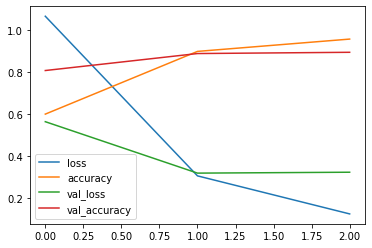

In [ ]:
losses=pd.DataFrame(historial.history)
losses.plot()

###### Resultados

In [ ]:
model = tf.keras.models.load_model('models/sentimiento_modelLSTM_v1.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               197632    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 1,494,470
Trainable params: 1,494,470
Non-trainable params: 0
_________________________________________________________________


In [ ]:
label2int = {
  "sadness": 4,
  "joy": 2,
  "love": 3,
  "anger": 0,
  "fear": 1,
  "surprise": 5
}

In [ ]:
int2label = {
  4: "sadness",
  2: "joy",
  3: "love",
  0: "anger",
  1: "fear",
  5: "surprise"
}

**Resultados en test**

In [ ]:
predict = model.predict(x_test)
sorting = (-y_test).argsort()
sorting_predicted = (-predict).argsort()
print(classification_report(sorting[:,0],
                            sorting_predicted[:,0],
                            target_names=label2int.keys(),
                            digits=len(label2int)))

              precision    recall  f1-score   support

     sadness   0.908425  0.901818  0.905109       275
         joy   0.859091  0.843750  0.851351       224
        love   0.942029  0.935252  0.938628       695
       anger   0.807453  0.817610  0.812500       159
        fear   0.930807  0.972461  0.951178       581
    surprise   0.795918  0.590909  0.678261        66

    accuracy                       0.910500      2000
   macro avg   0.873954  0.843633  0.856171      2000
weighted avg   0.909339  0.910500  0.909271      2000



**Resultados sobre lenguaje natural**

In [ ]:
example = "i feel like i m accomplishing something and when i feel passionate about life"
example = "ive been feeling jealous lately of bloggers going off to author readings and book si"
example = "How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##"

df_example = pd.DataFrame([example], columns = ['sentence']) 
text_example = df_example['sentence'].apply(text_process)
text_example

0    [fuk, heck, moved, fridge, knock, landlord, do...
Name: sentence, dtype: object

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)
sequence = tokenizer.texts_to_sequences(text_example)
data_example = pad_sequences(sequence, maxlen=max_len)

In [ ]:
predict = model.predict(data_example)
predict*10000

array([[9.9409189e+03, 4.8135296e+01, 1.0238465e+00, 6.6128116e+00,
        2.4369924e+00, 8.7251627e-01]], dtype=float32)

In [ ]:
sorting_predicted = (-predict).argsort()
print(sorting_predicted)
print(sorting_predicted[:,0])
print(int2label[sorting_predicted[:,0][0]])

[[0 1 3 4 2 5]]
[0]
anger


###### Evaluando el modelo sobre otro conjunto de datos

In [4]:
#Representacion del onehot encoding
y_test

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

Cargamos el modelo para realizar la prueba

In [ ]:
modelo_entrenado= tf.keras.models.load_model('models/sentimiento_modelLSTM_v1.h5')
modelo_entrenado.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               197632    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 1,494,470
Trainable params: 1,494,470
Non-trainable params: 0
_________________________________________________________________


In [ ]:
label2int = {
  "anger": 0,
  "fear": 1,
  "joy": 2,
  "love": 3,
  "sadness": 4,
  "surprise": 5
}
int2label = {
  4: "sadness",
  2: "joy",
  3: "love",
  0: "anger",
  1: "fear",
  5: "surprise"
}

In [ ]:
label2int.keys()

dict_keys(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])

In [ ]:
(-y_test).argsort()
predict = modelo_entrenado.predict(x_test)
sorting = (-y_test).argsort()
sorting_predicted = (-predict).argsort()
print(classification_report(sorting[:,0],
                            sorting_predicted[:,0],
                            target_names=label2int.keys(),
                            digits=len(label2int)))

              precision    recall  f1-score   support

       anger   0.225055  0.215728  0.220293       941
        fear   0.250000  0.077963  0.118860      1257
         joy   0.239052  0.369180  0.290196       902
        love   0.000000  0.000000  0.000000         1
     sadness   0.201586  0.206977  0.204246       860
    surprise   0.000000  0.000000  0.000000         1

    accuracy                       0.204947      3962
   macro avg   0.152616  0.144975  0.138932      3962
weighted avg   0.230948  0.204947  0.200432      3962



In [ ]:
predict = modelo_entrenado.predict(x_test)
sorting = (-y_test).argsort()
sorting_predicted = (-predict).argsort()
print(classification_report(sorting[:,0],
                            sorting_predicted[:,0],
                            target_names=label2int.keys(),
                            digits=len(label2int)))

              precision    recall  f1-score   support

       anger   0.225055  0.215728  0.220293       941
        fear   0.250000  0.077963  0.118860      1257
         joy   0.239052  0.369180  0.290196       902
        love   0.000000  0.000000  0.000000         1
     sadness   0.201586  0.206977  0.204246       860
    surprise   0.000000  0.000000  0.000000         1

    accuracy                       0.204947      3962
   macro avg   0.152616  0.144975  0.138932      3962
weighted avg   0.230948  0.204947  0.200432      3962



In [ ]:
df['label_predict'] = np.argmax(modelo_entrenado.predict(data_full),axis=-1)
df.head(15)

,sentence,label,sentence_normalized,label_predict
0,You make me breathless.,fear,make breathless,2
1,@Thebeast_ufc what happened to the suicide twe...,anger,happened suicide tweet joke obviously could of...,2
2,"Hello my dear friends, I will be back online t...",sadness,hello dear friends back online friday night mi...,4
3,@sebbyD27850 both are nonsensical. If there's ...,anger,nonsensical injustice blacks add destroying bl...,0
4,Lisa: Getting what you want all the time will ...,sadness,lisa getting want time ultimately leave unfulf...,2
5,@IndigoHawthorne Then u understand that rage i...,anger,u understand rage often pretty controlled rati...,2
6,Ffs dreadful defending,sadness,ffs dreadful defending,0
7,Dunno y am going to the Yorkshire scare ground...,fear,dunno going yorkshire scare grounds lasted min...,3
8,*ZETH voice*: Hit The Target \n (holds up upsi...,joy,zeth voice hit target n holds upside cheering ...,2
9,@PatBlanchfield so you mean “like Uber but for...,fear,mean like uber despair someone driver,2


###### Conclusiones

Tenemos entonces que nuestro modelo entrenado, en realidad esta muy sobreentrenado y nos obtuvo una mala precision dado otro conjunto de datos etiquetados, correspondientes a tweets clasificados con su respectivo sentimiento, al respecto esto puede ser debido a varios factores como nuestro word embedding no fue suficiente para encontrar una relacion entre las palabras, ademas de que las palabras en twitter muchas veces pudieron estar mal escritas y nuestro preprocesamiento no es suficiente para filtrar la gramatica, en general las metricas de **Precisión:** que nos indica de que los casos clasificados como positivos tienen un porcentaje muy bajo para ser clasificados correctamente, es decir mis datos clasificados como un sentimiento, cuales de estos si correspondian verdaderamente a este, con el **recall** es de los casos que realmente representaban ese sentimiento, cuales fueron clasificados correctamente, el **F1 score** que es una media armonica ponderada de la precision me sirve para comparar con otros modelos de clasificacion, para escoger el mejor en este caso, este modelo es muy malo.

##### Modelo 2: LSTM

## Conclusiones finales

- 
- 
- 
- 
- 

## 5. Referencias

- Sentiment analysis [[++](https://www.kaggle.com/adithyansukumar/sentiment-analysis)]
- Classify Emotions in text with BERT [[++](https://www.kaggle.com/praveengovi/classify-emotions-in-text-with-bert)]
- 
NLP-News [[++](https://www.kaggle.com/dionesiusap/nlp-news)]
- Where can I get an Emotion Dataset which contains phrases and their associated emotions ? [[++](https://www.researchgate.net/post/Where_can_I_get_an_Emotion_Dataset_which_contains_phrases_and_their_associated_emotions)]
- WASSA-2017 Shared Task on Emotion Intensity (EmoInt) [[++](http://saifmohammad.com/WebPages/EmotionIntensity-SharedTask.html)]
- lukasgarbas/nlp-text-emotion [[++](https://github.com/lukasgarbas/nlp-text-emotion/tree/master/data)]
- rgap/simbig2016-facebook-reactions [[++](https://github.com/rgap/simbig2016-facebook-reactions/tree/master/1_notebooks/data)]
- Trump's Facebook Statuses [[++](https://data.world/bgadoci/trumps-facebook-statuses)]
- Facebook Reactions [[++](https://www.kaggle.com/johanabrahamsson/facebook-reactions)]
- 2012-2016 Facebook Posts [[++](https://data.world/martinchek/2012-2016-facebook-posts)]
